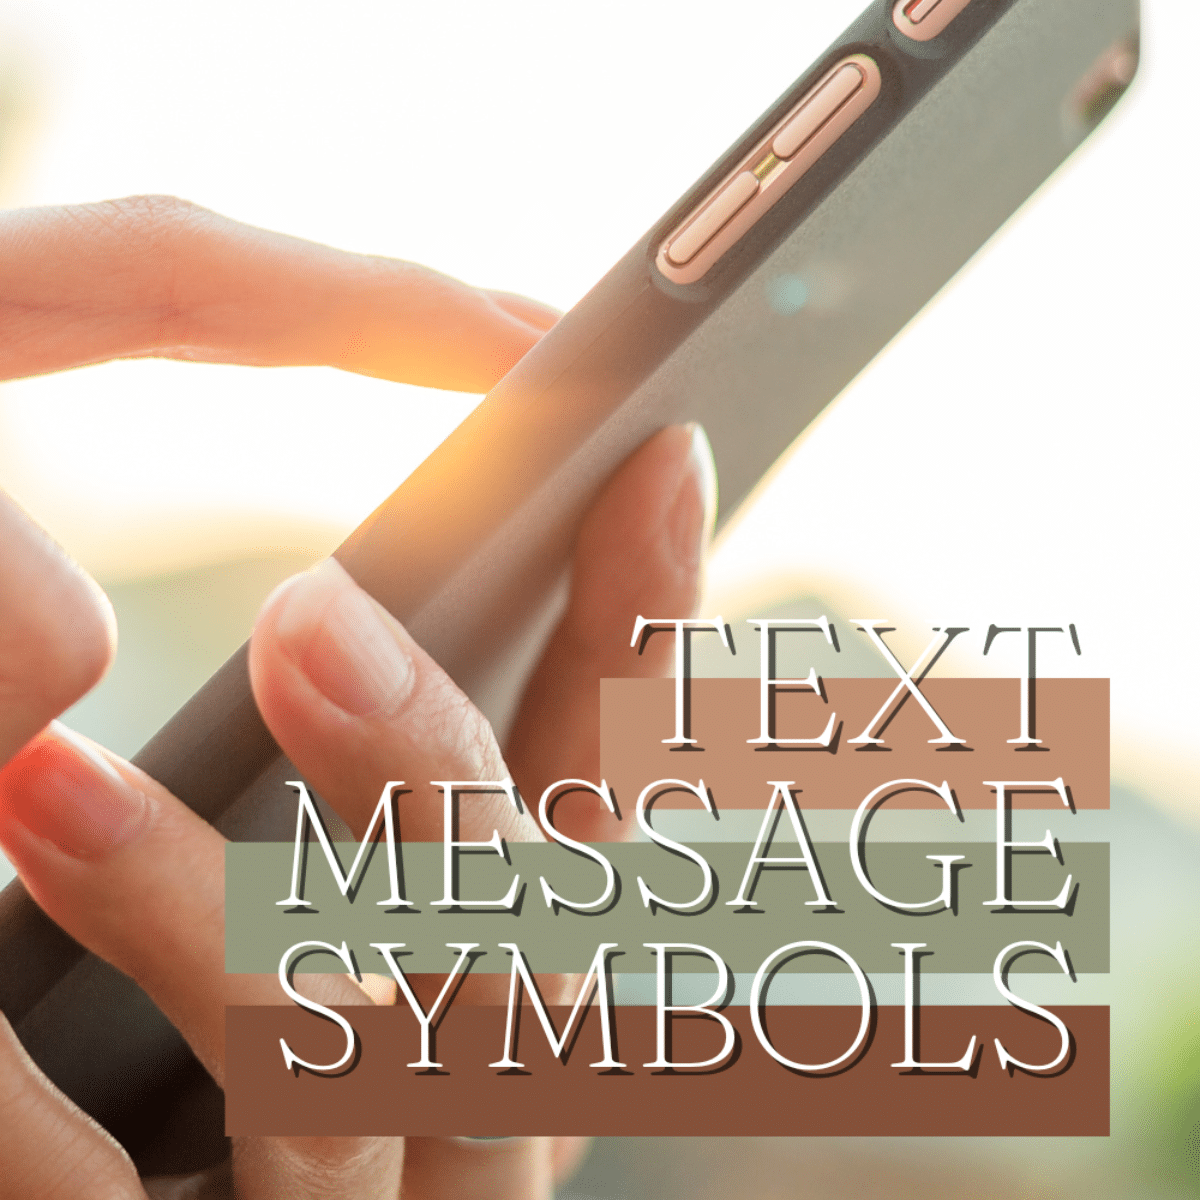

(<class 'PIL.PngImagePlugin.PngImageFile'>, <class 'PIL.ImageFile.ImageFile'>, <class 'PIL.Image.Image'>, <class 'object'>)


In [1]:
# We're going to start experimenting with tesseract using just a simple image of nice clean text.
# Lets first import Image from PIL and display the image text.png.
import PIL
from PIL import Image

image=Image.open("C:/Users/user/Downloads/text_pic_sample.png")
display(image)
import inspect
print(inspect.getmro(type(image)))

In [2]:
# Great, we have a base image of some big clear text
# Lets import pytesseract and use the dir() fundtion to get a sense of what might be some interesting
# functions to play with
import pytesseract
pytesseract.pytesseract.tesseract_cmd=r"C:/Program Files/Tesseract-OCR/tesseract.exe"
dir(pytesseract)



['ALTONotSupported',
 'Output',
 'TSVNotSupported',
 'TesseractError',
 'TesseractNotFoundError',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'get_languages',
 'get_tesseract_version',
 'image_to_alto_xml',
 'image_to_boxes',
 'image_to_data',
 'image_to_osd',
 'image_to_pdf_or_hocr',
 'image_to_string',
 'pytesseract',
 'run_and_get_output']

In [3]:
# It looks like there are just a handful of interesting functions, and I think image_to_string
# is probably our best bet. Lets use the help() function to interrogate this a bit more 
help(pytesseract.image_to_string)

Help on function image_to_string in module pytesseract.pytesseract:

image_to_string(image, lang=None, config='', nice=0, output_type='string', timeout=0)
    Returns the result of a Tesseract OCR run on the provided image to string



In [ ]:
# So this function takes an image as the first parameter, then there are a bunch of optional parameters,
# and it will return the results of the OCR. I think it's worth comparing this documentation string
# with the documentation we were receiving from the PILLOW module. Lets run the help command on the 
# Image resize function()
help(Image.Image.resize)

In [5]:
# Notice how the PILLOW function has a bit more information in it. First it's using a specific format
# called reStructuredText, which is similar in intent to document markups such as HTML, the language of
# the web. The intent is to embed semantics in the documentation itself. For instance, in the resize()
# function we see the words "param size" with colons surrounding it. This allows documentation engines
# which create web docs from source code to link the parameter to the extended docs about that parameter.
# In this case the extended docs tell us that the size should be passed as a tuple of width and height.
# Notice how the docs for image_to_string, for instance, indicate that there is a "lang" parameter we can
# use, but then fail to say anything about what that parameter is for or what its format is.
#
# What this really means is that we need to dig deeper. Here's a quick hack if you want to look at the
# source code of a function -- you can use the inspect getsource() command and print the results
import inspect
src=inspect.getsource(pytesseract.image_to_string)
print(src)

def image_to_string(
    image,
    lang=None,
    config='',
    nice=0,
    output_type=Output.STRING,
    timeout=0,
):
    """
    Returns the result of a Tesseract OCR run on the provided image to string
    """
    args = [image, 'txt', lang, config, nice, timeout]

    return {
        Output.BYTES: lambda: run_and_get_output(*(args + [True])),
        Output.DICT: lambda: {'text': run_and_get_output(*args)},
        Output.STRING: lambda: run_and_get_output(*args),
    }[output_type]()



In [ ]:
# There's actually another way in jupyter, and that's to append *two* question marks to the end of
# a given function or module. Other editors have similar features, and is a great reason to use a 
# software development environment
pytesseract.image_to_string??

In [7]:
# We can see from the source code that there really isn't much more information about what the parameters
# are for this image_to_string function. This is because underneath the pytesseract library is calling a C++
# library which does all of the hard work, and the author just passes through all of the calls to the 
# underlying tesseract executable. This is a common issue when working with python libraries, and it means
# we need to do some web sleuthing in order to understand how we can interact with tesseract.
#
# In a case like this I just googled "tesseract command line parameters" and the first hit was what I was
# looking for, here's the URL: https://tesseract-ocr.github.io/tessdoc/Command-Line-Usage
#
# This goes to a wiki page which describes how to call the tesseract executable, and as we read down we see
# that we can actually have tesseract use multiple languages in its detection, such as English and Hindi, by
# passing them in as "eng+hin". Very cool. 

In [21]:
# One last thing to mention - the image_to_string() function takes in an "image", but the docs don't
# really describe what this image is underneath. Is it a string to an image file? A PILLOW image?
# Something else?
#
# Again we have to sleuth (and/or experiment) to understand what we should do. If we look at the source
# code for the pytesseract library, we see that there is a function called run_and_get_output(). Here's
# a link to that function on the author's github account:
# https://github.com/madmaze/pytesseract/blob/d1596f7f59a517ad814b7d810ccdef7d33763221/src/pytesseract.py#L199
#
# In this function we see that one of the first things which happens is the image is saved through
# the save_image() function. Here's that line of code:
# https://github.com/madmaze/pytesseract/blob/d1596f7f59a517ad814b7d810ccdef7d33763221/src/pytesseract.py#L116
#
# And we see there that another function is called, prepare(image), which actually loads the image as a
# PILLOW image file. So yes, sending a PIL image file is appropriate use for this function! It sure would
# have been useful for the author to have included this information in reStructuredText to help us not have
# to dig through the implementation. But, this is an open source project -- maybe you would like to contribute
# back better documentation?
#
# Hint: The doc line we needed was :param image: A PIL Image.Image file or an ndarray of bytes
#
# In the end, we often don't do this full level of investigation, and we just experiment and try things. It
# seems likely that a PIL Image.Image would work, given how well known PIL is in the python world. But still,
# as you explore and use different libraries you'll see a breadth of different documentation norms, so it's
# useful to know how to explore the source code. And now that you're at the end of this course, you've got
# the skills to do so!
#
# Ok, lets try and run tesseract on this image
pytesseract.image_to_string(image)


''

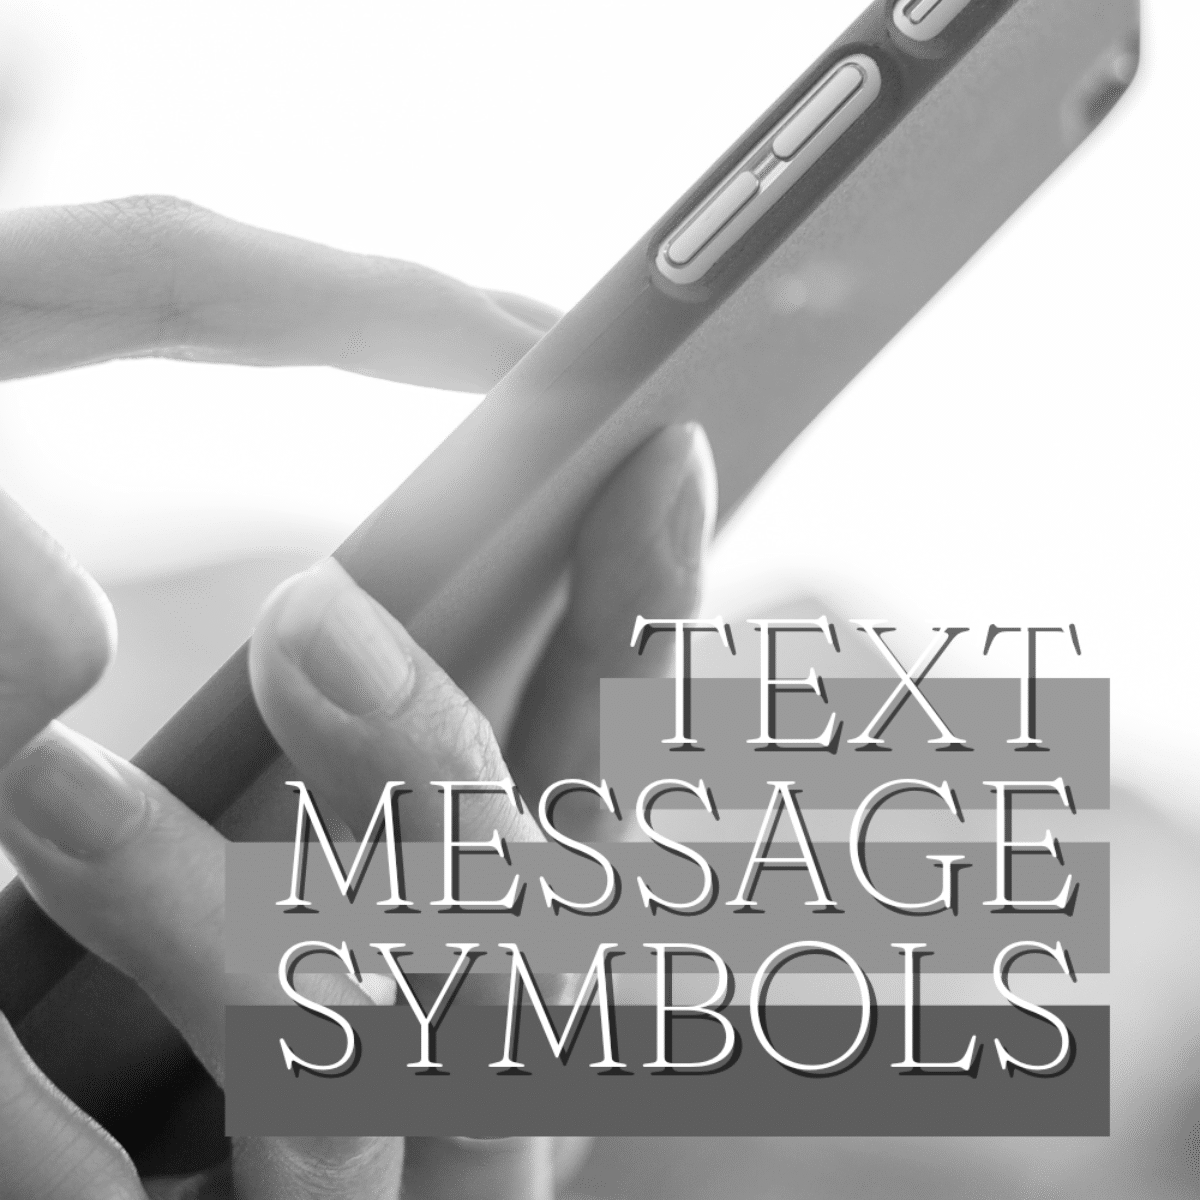

<PIL.Image.Image image mode=L size=1200x1200 at 0x1888F2AA150>



In [24]:
# We see at the very bottom there is just an empty string. Tesseract is unable to take
# this image and pull out the name. Sometimes there will 
# be noise in images you want to OCR, making it difficult to extract the text. Luckily, there are 
# techniques we can use to increase the efficacy of OCR with pytesseract and Pillow.
gray_img=image.convert("L")
display(gray_img)
print(gray_img)
text=pytesseract.image_to_string(gray_img)
print(text)

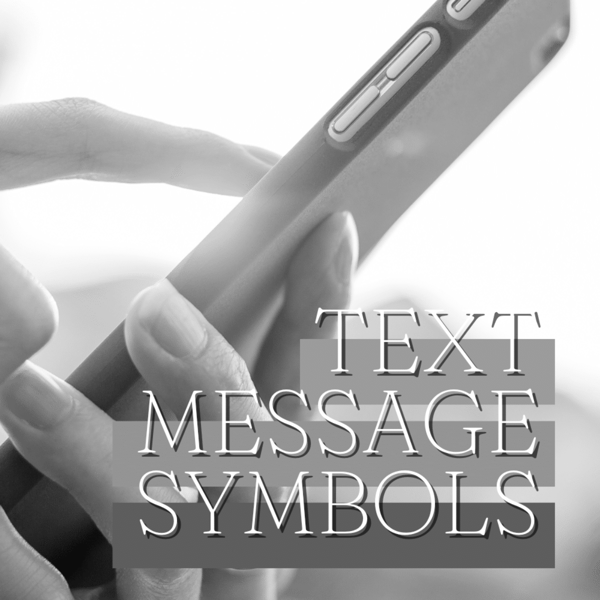

In [6]:
#Let's experiment on the image 
# using techniqes that will allow for more effective image analysis. First up, lets change the size of the image
# set the base width of our image
basewidth=600
# We want to get the correct aspect ratio, so we can do this by taking the base width and dividing
# it by the actual width of the image
wpercent = (basewidth / float(gray_img.size[0]))
# With that ratio we can just get the appropriate height of the image.
hsize=int(float(gray_img.size[1]) * float(wpercent))
# Finally, lets resize the image. antialiasing is a specific way of resizing lines to try and make them 
# appear smooth
img=gray_img.resize((basewidth,hsize))
display(img)
text=pytesseract.image_to_string(img)
print(text)




In [ ]:
help(img.convert)

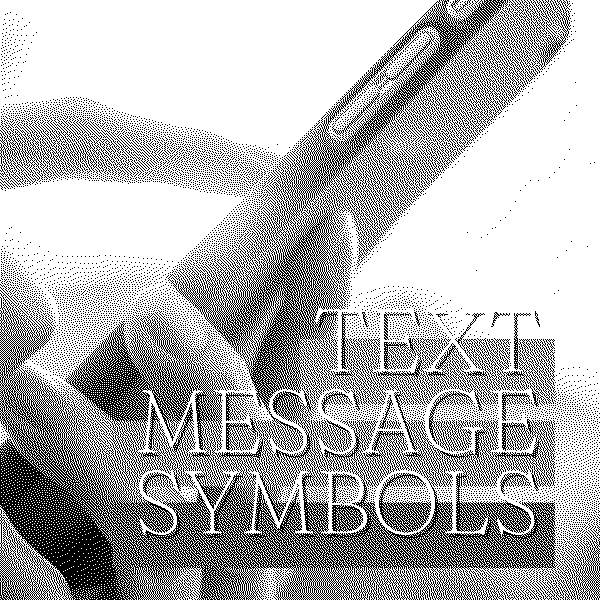

EO




In [7]:
# Even though we have now the complete text of the image, there are a few other techniques
# we could use to help improve OCR detection in the event that the above two don't help.
# The next approach I would use is called binarization, which means to separate into two
# distinct parts - in this case, black and white. Binarization is enacted through a process 
# called thresholding. If a pixel value is greater than a threshold value, it will be converted
# to a black pixel; if it is lower than the threshold it will be converted to a white pixel. 
# This process eliminates noise in the OCR process allowing greater image recognition accuracy. 
# With Pillow, this process is straightforward.
# Lets open the noisy impage and convert it using binarization
b_w_img=img.convert("1")
display(b_w_img)
text=pytesseract.image_to_string(b_w_img)
print(text)

In [ ]:
# So, that was a bit magical, and really required a fine reading of the docs to figure out
# that the number "1" is a string parameter to the convert function actually does the binarization.
# But you actually have all of the skills you need to write this functionality yourself.
# Lets walk through an example. First, lets define a function called binarize, which takes in
# an image and a threshold value:
def binarize(img_to_transform,thresold):
    new_img=img_to_transform.convert("L")
    # the threshold value is usually provided as a number between 0 and 255.
    # the algorithm for the binarization is pretty simple, go through every pixel in the
    # image and, if it's greater than the threshold, turn it all the way up (255), and
    # if it's lower than the threshold, turn it all the way down (0).
    # so lets write this in code. First, we need to iterate over all of the pixels in the
    # image we want to work with
    for x in range(new_img.width):
        for y in range(new_img.height):
            if new_img.getpixel((x,y))<thresold:
                new_img.putpixel((x,y),0)
            else:
                new_img.putpixel((x,y),255)
    return new_img

# lets test this function over a range of different thresholds. Remember that you can use
# the range() function to generate a list of numbers at different step sizes. range() is called
# with a start, a stop, and a step size. So lets try range(0, 257, 64), which should generate 5
# images of different threshold values
image=Image.open("C:/Users/keyap/Downloads/text_pic_sample.png")
basewidth=600
wpercent = (basewidth / float(gray_img.size[0]))
hsize=int(float(gray_img.size[1]) * float(wpercent))
img=image.resize((basewidth,hsize))
for thr in range(0,257,50):
    print("Trying with threshold " + str(thr))
    # Lets display the binarized image inline
    display(binarize(img,thr))
    
    text=pytesseract.image_to_string(binarize(img,thr))
    print(text)
    
display(binarize(img,254))
pytesseract.image_to_string(binarize(img,252))


    

## jupyter widgets:

In [32]:
# In this brief lecture I want to introduce you to one of the more advanced features of the 
# Jupyter notebook development environment called widgets. Sometimes you want
# to interact with a function you have created and call it multiple times with different
# parameters. For instance, if we wanted to draw a red box around a portion of an
# image to try and fine tune the crop location. Widgets are one way to do this quickly
# in the browser without having to learn how to write a large desktop application.
#
# Lets check it out. First we want to import the Image and ImageDraw classes from the
# PILLOW package
from PIL import Image ,ImageDraw
# Then we want to import the interact class from the widgets package
from ipywidgets import interact
# We will use interact to annotate a function. Lets bring in an image that we know 
image=Image.open("C:/Users/user/Downloads/text_pic_sample.png")
basewidth=600
wpercent = (basewidth / float(gray_img.size[0]))
hsize=int(float(gray_img.size[1]) * float(wpercent))
img=image.resize((basewidth,hsize))
# Ok, our setup is done. Now we're going to use the interact decorator to indicate
# that we want to wrap the python function. We do this using the @ sign. This will
# take a set of parameters which are identical to the function to be called. Then Jupyter
# will draw some sliders on the screen to let us manipulate these values. Decorators,
# which is what the @ sign is describing, are standard python statements and just a
# short hand for functions which wrap other functions. They are a bit advanced though, so
# we haven't talked about them in this course, and you might just have to have some faith
@interact(left=100, top=300, right=555, bottom=549)
# Now we just write the function we had before
def draw_border(left, top, right, bottom):
    imge=img.copy()
    drawing_object=ImageDraw.Draw(imge)
    drawing_object.rectangle((left,top,right,bottom))
    display(imge)
    



interactive(children=(IntSlider(value=100, description='left', max=300, min=-100), IntSlider(value=300, descri…

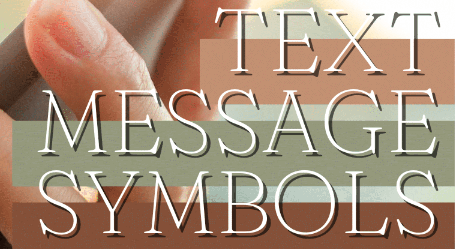

'“inti geale\nMESSAGE\nSVMBeors\n'

In [35]:
#so lets try and help Tesseract by cropping out certain pieces.
border=(100,300,555,549)
# Now lets crop the image
title_image=img.crop(border)
# Now lets display it and pull out the text
display(title_image)
pytesseract.image_to_string(title_image)

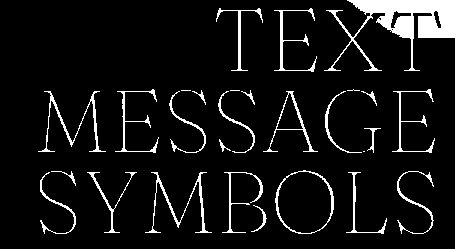

<PIL.Image.Image image mode=P size=455x249 at 0x188A7445450>
VLEXT
MESSAGE
SYMBOLS




In [63]:
#call binarize method
display(binarize(title_image,252))
print(title_image)
text=pytesseract.image_to_string(binarize(title_image,251))
print(text)

In [ ]:
# Now lets check the docs for resize()
help(title_image.resize)

0


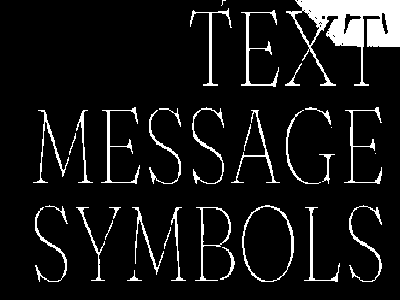

TEX®
MESSAGE
SYMBOLS

4


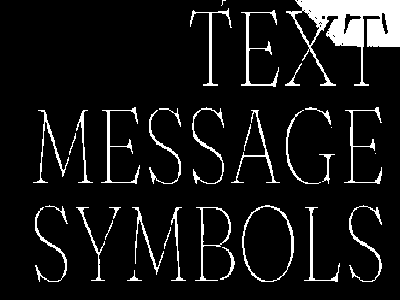

TEX®
MESSAGE
SYMBOLS

2


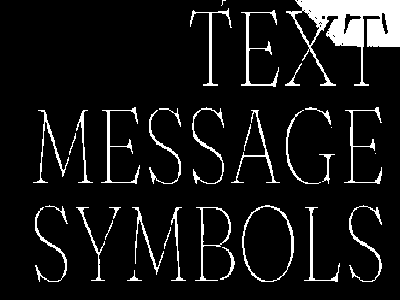

TEX®
MESSAGE
SYMBOLS

5


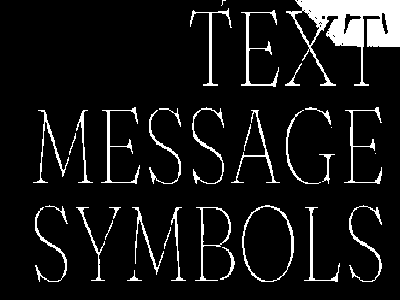

TEX®
MESSAGE
SYMBOLS

3


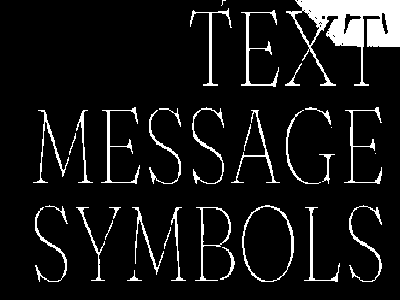

TEX®
MESSAGE
SYMBOLS

1


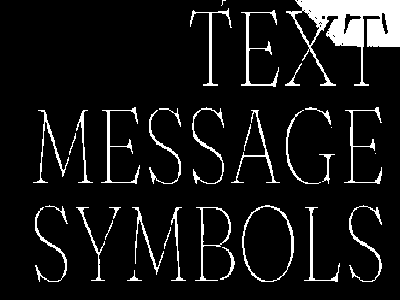

TEX®
MESSAGE
SYMBOLS



In [73]:
# We can see that there are a number of different filters for resizing the image. The
# default is Image.NEAREST.
# I think we should be able to find something better. I can read it, but it looks
# really pixelated. Lets see what all the different resize options look like
options=[Image.NEAREST, Image.BOX, Image.BILINEAR, Image.HAMMING, Image.BICUBIC, Image.LANCZOS]
for option in options:
    print(option)
    filter_img=title_image.resize((400,300),option)
    display(binarize(filter_img,245))
    print(pytesseract.image_to_string(binarize(filter_img,245)))